In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("/home/nick/C2S-Python-API/")
import os
import numpy as np
import matplotlib.pyplot as plt

from c2s.external.batch.sensor_batch import SensorBatch
from c2s.external.stac.viirs_class import ViirsCMR
from c2s.external.stac.viirs_375_toa_processor import ViirsProcessor375

import shapely
from shapely.ops import transform

import rasterio
import rasterio.windows
from rasterio.warp import calculate_default_transform

import affine

In [3]:
# example of an image near the equator + anitmeridian that ends up wayyy to big
tile_dict = {'tile_id': 'VNP02.A2023001.0048.002',
   'urls': {'idata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2023/001/VNP02IMG.A2023001.0048.002.2023001101151.nc',
    'igeo': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2023/001/VNP03IMG.A2023001.0048.002.2023001094356.nc',
    'mdata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2023/001/VNP02MOD.A2023001.0048.002.2023001101151.nc',
    'mgeo': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2023/001/VNP03MOD.A2023001.0048.002.2023001094356.nc',
    'cmdata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2023/001/CLDMSK_L2_VIIRS_SNPP.A2023001.0048.001.2023001131937.nc'}}

In [4]:
# download (set your download dir)
# download_dir = "./test_data"
# os.makedirs(download_dir, exist_ok=True)

# vclass.download_image(
#     tile_dict,
#     base_dir=download_dir
# )

In [5]:
# processor
download_dir = "./test_data"
proc = ViirsProcessor375(
    f"{download_dir}/{tile_dict['tile_id']}",
    f"{download_dir}/{tile_dict['tile_id']}_test",
)

2023-04-24 23:40:50,172 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:69 DEBUG: id: VNP02.A2023001.0048.002
2023-04-24 23:40:50,172 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:69 DEBUG: id: VNP02.A2023001.0048.002
2023-04-24 23:40:50,173 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:72 DEBUG: save_folder: ./test_data/VNP02.A2023001.0048.002_test/VNP02.A2023001.0048.002
2023-04-24 23:40:50,173 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:72 DEBUG: save_folder: ./test_data/VNP02.A2023001.0048.002_test/VNP02.A2023001.0048.002
2023-04-24 23:40:50,480 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:83 WARNING: Data cross antimeridian, requires two-step warping
2023-04-24 23:40:50,480 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:83 WARNING: Data cross antimeridian, requires two-step warping


In [6]:
proc.metadata

{'platform': 'Suomi-NPP',
 'instrument': 'VIIRS',
 'production_datetime': '2023-01-01T05:12:15Z',
 'acquisition_datetime': '2023-01-01 00:48:00.000',
 'west': 175.46957,
 'north': -5.4363089,
 'east': -150.28033,
 'south': -30.389168,
 'width_375': 6400,
 'height_375': 6464,
 'width_750': 3200,
 'height_750': 3232}

In [7]:
proc.transform375

[-4.5304299999999955,
 0.005351578125000001,
 0,
 -5.4363089,
 0,
 -0.0038602814201732674]

In [8]:
proc.input_bounds

(-4.530000000000001, -30.3892, 29.72, -5.4363098)

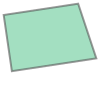

In [9]:
proc.gring

In [10]:
print(proc.gring)

POLYGON ((-4.530000000000001 -9.6127596, 23.001010000000008 -5.4363098, 29.72 -25.655001, -1.5039999999999907 -30.3892, -4.530000000000001 -9.6127596))


In [11]:
proc.input_bounds

(-4.530000000000001, -30.3892, 29.72, -5.4363098)

In [12]:
proc.output_bounds

(17154814.425448257,
 -3363258.4483524435,
 22497002.125075568,
 -601134.1009826321)

In [17]:
# make geotiff
proc.make_tiff()

2023-04-25 00:05:45,754 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:461 DEBUG: Processing Cloud_Mask to tif.
2023-04-25 00:05:45,754 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:461 DEBUG: Processing Cloud_Mask to tif.
2023-04-25 00:05:45,762 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:530 DEBUG: meta_dict={'X_DATASET': './test_data/VNP02.A2023001.0048.002_test/VNP02.A2023001.0048.002/VNP02.A2023001.0048.002_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': './test_data/VNP02.A2023001.0048.002_test/VNP02.A2023001.0048.002/VNP02.A2023001.0048.002_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}
2023-04-25 00:05:45,762 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:530 DEBUG: meta_dict={'X_DATASET': './test_data/VNP02.A2023001.0048.002_test/VNP02.A2023001.0048.002/VNP02.A2023001.0048.002_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': './test_data/VN

'./test_data/VNP02.A2023001.0048.002_test/VNP02.A2023001.0048.002'

In [70]:
# test the STAC item builder
proc.build_item()

2023-04-19 23:13:08,886 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:724 INFO: VNP02.A2023001.0048.002: Building two STAC items (one for positive lons, one for negative lons)
2023-04-19 23:13:08,886 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:724 INFO: VNP02.A2023001.0048.002: Building two STAC items (one for positive lons, one for negative lons)


[<Item id=VNP02.A2023001.0048.002_positive>,
 <Item id=VNP02.A2023001.0048.002_negative>]

In [71]:
# test the stac uploader
proc.upload_to_c2s_stac()

2023-04-19 23:13:15,891 c2s.external.stac.base_processor base_processor.py:234 DEBUG: self.id='VNP02.A2023001.0048.002'
2023-04-19 23:13:15,891 c2s.external.stac.base_processor base_processor.py:234 DEBUG: self.id='VNP02.A2023001.0048.002'
2023-04-19 23:13:15,893 c2s.external.stac.base_processor base_processor.py:234 DEBUG: self.id='VNP02.A2023001.0048.002_positive'
2023-04-19 23:13:15,893 c2s.external.stac.base_processor base_processor.py:234 DEBUG: self.id='VNP02.A2023001.0048.002_positive'
2023-04-19 23:13:37,287 c2s.external.stac.base_processor base_processor.py:323 DEBUG: VNP02.A2023001.0048.002_positive: gcs stac item: viirs375_data/imagery/0048/2023001/VNP02/VNP02.A2023001.0048.002_positive.geojson
2023-04-19 23:13:37,287 c2s.external.stac.base_processor base_processor.py:323 DEBUG: VNP02.A2023001.0048.002_positive: gcs stac item: viirs375_data/imagery/0048/2023001/VNP02/VNP02.A2023001.0048.002_positive.geojson
2023-04-19 23:13:37,372 c2s.web.stac_api stac_api.py:373 INFO: putti

['./test_data/VNP02.A2023001.0048.002_test/VNP02.A2023001.0048.002',
 './test_data/VNP02.A2023001.0048.002_test/VNP02.A2023001.0048.002']

In [58]:
proc.id

'VNP02.A2023001.0048.002'

In [59]:
proc.id = "VNP02.A2023001.0048.002"

In [77]:
# can we run processing from beginning to end like we will in dataflow??
from c2s.external.batch.download.preprocess.process_sensor_data import preprocess


# processor
download_dir = "./test_data"

preprocess(
    download_path=f"{download_dir}/{tile_dict['tile_id']}",
    tile_json="gs://viirs375_data/ingest_tile_logs/viirs375_process_20230412-211121.json",
    sensor="viirs375",
)

2023-04-20 17:34:54,205 c2s.external.batch.download.preprocess.process_sensor_data process_sensor_data.py:52 DEBUG: Processor instantiated with download_path ./test_data/VNP02.A2023001.0048.002
2023-04-20 17:34:54,205 c2s.external.batch.download.preprocess.process_sensor_data process_sensor_data.py:52 DEBUG: Processor instantiated with download_path ./test_data/VNP02.A2023001.0048.002
2023-04-20 17:34:54,206 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:68 DEBUG: id: VNP02.A2023001.0048.002
2023-04-20 17:34:54,206 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:68 DEBUG: id: VNP02.A2023001.0048.002
2023-04-20 17:34:54,207 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:71 DEBUG: save_folder: stac/VNP02.A2023001.0048.002
2023-04-20 17:34:54,207 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:71 DEBUG: save_folder: stac/VNP02.A2023001.0048.002
2023-04-20 17:34:54,516 c2s.external.stac.viirs_375_toa_proc

/usr/local/lib/python3.8/site-packages/rio_tiler/io/cogeo.py:139: NoOverviewWarning: The dataset has no Overviews. rio-tiler performances might be impacted.
  warnings.warn(


2023-04-20 17:47:55,150 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:843 DEBUG: VNP02.A2023001.0048.002: gsw_destination='stac/VNP02.A2023001.0048.002/GSW_negative.tif'
2023-04-20 17:47:55,150 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:843 DEBUG: VNP02.A2023001.0048.002: gsw_destination='stac/VNP02.A2023001.0048.002/GSW_negative.tif'


/usr/local/lib/python3.8/site-packages/rio_tiler/io/cogeo.py:139: NoOverviewWarning: The dataset has no Overviews. rio-tiler performances might be impacted.
  warnings.warn(


2023-04-20 17:48:39,034 c2s.external.batch.download.preprocess.process_sensor_data process_sensor_data.py:83 INFO: VNP02.A2023001.0048.002: generate_static() took 59.9s
2023-04-20 17:48:39,034 c2s.external.batch.download.preprocess.process_sensor_data process_sensor_data.py:83 INFO: VNP02.A2023001.0048.002: generate_static() took 59.9s
2023-04-20 17:48:39,035 c2s.external.batch.download.preprocess.process_sensor_data process_sensor_data.py:92 INFO: VNP02.A2023001.0048.002: Beginning to upload_to_c2s_stac()
2023-04-20 17:48:39,035 c2s.external.batch.download.preprocess.process_sensor_data process_sensor_data.py:92 INFO: VNP02.A2023001.0048.002: Beginning to upload_to_c2s_stac()
2023-04-20 17:48:39,036 c2s.external.stac.base_processor base_processor.py:234 DEBUG: self.id='VNP02.A2023001.0048.002'
2023-04-20 17:48:39,036 c2s.external.stac.base_processor base_processor.py:234 DEBUG: self.id='VNP02.A2023001.0048.002'
2023-04-20 17:48:39,039 c2s.external.stac.base_processor base_processor.py

True

In [65]:
print("done")

done


## Testing Dataflow with updated processor

### Crossing antimeridian

In [4]:
batch = SensorBatch(
    sensor="viirs375",
    tile_list=[tile_dict],
)

In [5]:
os.environ["DATAFLOW_IMAGE_TAG"] = "latest"
batch.download(download_again=True)

/home/nick/C2S-Python-API/c2s/external/stac/planet_api_class.py:11: ClientV1DeprecationWarning: The planet.api module is deprecated and will be removed in version 2.0.0. For more details please see the discussion at https://github.com/planetlabs/planet-client-python/discussions.
  from planet import api
Searching the STAC server for items in collections ['viirs375_data']: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.90queries/s]

2023-04-20 18:42:05,434 c2s.external.batch.sensor_batch sensor_batch.py:834 INFO: ====================================================================================================
2023-04-20 18:42:05,434 c2s.external.batch.sensor_batch sensor_batch.py:834 INFO: ====================================================================================================
2023-04-20 18:42:05,434 c2s.external.batch.sensor_batch sensor_batch.py:835 INFO: 1/1 tiles are not already in the stac server
2023-04-20 18:42:05,434 c2s.external.batch.sensor_batch sensor_batch.py:835 INFO: 1/1 tiles are not already in the stac server
2023-04-20 18:42:05,435 c2s.external.batch.sensor_batch sensor_batch.py:838 INFO: ====================================================================================================
2023-04-20 18:42:05,435 c2s.external.batch.sensor_batch sensor_batch.py:838 INFO: ====================================================================================================
2023-04-20 18:

2023-04-20 18:42:07,177 c2s.external.batch.download.preprocess.deploy_data_processing deploy_data_processing.py:354 INFO: Dataflow job will be running with the following image and tag: data-downlaod:latest
2023-04-20 18:42:07,177 c2s.external.batch.download.preprocess.deploy_data_processing deploy_data_processing.py:354 INFO: Dataflow job will be running with the following image and tag: data-downlaod:latest
2023-04-20 18:42:07,221 c2s.external.batch __init__.py:158 INFO: Dataflow labels for current job: ['--label', 'git-useremail=nick-at-cloudtostreet-dot-info', '--label', 'git-username=nick_leach', '--label', 'hostname=edf429c6f781']


Using flags: ['--job_name', 'unknown-region-nrt-ingest-viirs375-1tiles-20230420-184205', '--temp_location', 'gs://viirs375_data/tmp', '--staging_location', 'gs://viirs375_data/staging', '--machine_type', 'n2-highmem-4', '--disk_size_gb', '100', '--project', 'cloudtostreet', '--region', 'us-central1', '--runner', 'DataflowRunner', '--experiment', 'use_runner_v2', '--setup_file', '/home/nick/C2S-Python-API/setup.py', '--worker_harness_container_image', 'gcr.io/cloudtostreet/data-download:latest', '--max_num_workers', '1', '--number_of_worker_harness_threads', '1', '--label', 'git-useremail=nick-at-cloudtostreet-dot-info', '--label', 'git-username=nick_leach', '--label', 'hostname=edf429c6f781', '--label', 'tag=latest', '--save_main_session']
2023-04-20 18:42:07,245 c2s.external.batch.download.preprocess.deploy_data_processing deploy_data_processing.py:264 INFO: sensor: viirs375 
 tiles: [{'tile_id': 'VNP02.A2023001.0048.002', 'urls': {'idata': 'https://ladsweb.modaps.eosdis.nasa.gov/arch

INFO:c2s.external.batch.download.preprocess.deploy_data_processing:sensor: viirs375 
 tiles: [{'tile_id': 'VNP02.A2023001.0048.002', 'urls': {'idata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2023/001/VNP02IMG.A2023001.0048.002.2023001101151.nc', 'igeo': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2023/001/VNP03IMG.A2023001.0048.002.2023001094356.nc', 'mdata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2023/001/VNP02MOD.A2023001.0048.002.2023001101151.nc', 'mgeo': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2023/001/VNP03MOD.A2023001.0048.002.2023001094356.nc', 'cmdata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2023/001/CLDMSK_L2_VIIRS_SNPP.A2023001.0048.001.2023001131937.nc'}}]


2023-04-20 18:42:07,245 c2s.external.batch.download.preprocess.deploy_data_processing deploy_data_processing.py:270 INFO: entered run job
2023-04-20 18:42:07,245 c2s.external.batch.download.preprocess.deploy_data_processing deploy_data_processing.py:270 INFO: entered run job


INFO:c2s.external.batch.download.preprocess.deploy_data_processing:entered run job


Starting Beam job.





[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


Running.View progress in your browser at:
	https://console.cloud.google.com/dataflow/jobs/us-central1/2023-04-20_11_42_13-17838631378318934762?project=cloudtostreet


[<DataflowPipelineResult <Job
  clientRequestId: '20230420184209883846-3572'
  createTime: '2023-04-20T18:42:15.227278Z'
  currentStateTime: '1970-01-01T00:00:00Z'
  id: '2023-04-20_11_42_13-17838631378318934762'
  location: 'us-central1'
  name: 'unknown-region-nrt-ingest-viirs375-1tiles-20230420-184205'
  projectId: 'cloudtostreet'
  stageStates: []
  startTime: '2023-04-20T18:42:15.227278Z'
  steps: []
  tempFiles: []
  type: TypeValueValuesEnum(JOB_TYPE_BATCH, 1)> at 0x7f45b19747f0>]

In [6]:
import gcsfs
import json

fs = gcsfs.GCSFileSystem()

with fs.open("gs://viirs375_data/imagery/0048/2023001/VNP02/VNP02.A2023001.0048.002_negative.geojson") as f:
    out = json.load(f)
    
out

{'type': 'Feature',
 'stac_version': '1.0.0',
 'id': 'VNP02.A2023001.0048.002_negative',
 'properties': {'gsd': 750.0,
  'instruments': ['VIIRS'],
  'platform': 'Suomi-NPP',
  'constellation': 'Suomi-NPP',
  'proj:epsg': None,
  'proj:wkt2': 'PROJCS["MODIS Sinusoidal",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.01745329251994328,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Sinusoidal"],PARAMETER["false_easting",0.0],PARAMETER["false_northing",0.0],PARAMETER["central_meridian",0.0],PARAMETER["semi_major",6371007.181],PARAMETER["semi_minor",6371007.181],UNIT["m",1.0]]',
  'datetime': '2023-01-01T00:48:00Z',
  'biome_name': 'Tropical & Subtropical Moist Broadleaf Forests',
  'continent_name': 'South America',
  'country_name': 'Brazil',
  'SMOD_percent': {'0': 81.9,
   '11': 17.7,
   '12': 0.2,
   '13': 0.0,
   '21': 0.0,
   '22

In [7]:
import pystac

item = pystac.Item.from_dict(out)
item

<Item id=VNP02.A2023001.0048.002_negative>

In [9]:
item.properties["crosses_antimeridian"] = True

In [10]:
item.properties

{'gsd': 750.0,
 'instruments': ['VIIRS'],
 'platform': 'Suomi-NPP',
 'constellation': 'Suomi-NPP',
 'proj:epsg': None,
 'proj:wkt2': 'PROJCS["MODIS Sinusoidal",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.01745329251994328,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Sinusoidal"],PARAMETER["false_easting",0.0],PARAMETER["false_northing",0.0],PARAMETER["central_meridian",0.0],PARAMETER["semi_major",6371007.181],PARAMETER["semi_minor",6371007.181],UNIT["m",1.0]]',
 'datetime': '2023-01-01T00:48:00Z',
 'biome_name': 'Tropical & Subtropical Moist Broadleaf Forests',
 'continent_name': 'South America',
 'country_name': 'Brazil',
 'SMOD_percent': {'0': 81.9,
  '11': 17.7,
  '12': 0.2,
  '13': 0.0,
  '21': 0.0,
  '22': 0.0,
  '23': 0.0,
  '30': 0.0},
 'SMOD_majority_id': 0,
 'SMOD_majority_name': 'Water grid',
 'SMOD_Urban_percent': 

In [11]:
item.id

'VNP02.A2023001.0048.002_negative'

In [18]:
mapper = {"positive": "negative", "negative": "positive"}
for k, v in mapper.items():
    item.id = item.id.replace(k, v)
    
item.id

'VNP02.A2023001.0048.002_positive'

### Making sure we didn't break anything if it DOESN'T cross antimeridian

In [6]:
congo_geom = {"type":"Polygon","coordinates":[[[14.545912658064708,2.894919331751849],[14.545912658064708,-6.777925416519486],[25.246596251814708,-6.777925416519486],[25.246596251814708,2.894919331751849], [14.545912658064708,2.894919331751849]]]}

start_date = "2021-07-26"
end_date = "2021-08-03"

v = ViirsCMR()

results, _ = v.query_viirs_375_imagery(
    start_date=start_date,
    end_date=end_date,
    roi=congo_geom
)

2023-04-20 18:53:59,220 c2s.external.stac.viirs_class viirs_class.py:439 DEBUG: 0 dates missing: []
2023-04-20 18:53:59,220 c2s.external.stac.viirs_class viirs_class.py:439 DEBUG: 0 dates missing: []


DEBUG:c2s.external.stac.viirs_class:0 dates missing: []


2023-04-20 18:53:59,223 c2s.external.stac.viirs_class viirs_class.py:440 DEBUG: 0 tiles without 5 urls: []
2023-04-20 18:53:59,223 c2s.external.stac.viirs_class viirs_class.py:440 DEBUG: 0 tiles without 5 urls: []


DEBUG:c2s.external.stac.viirs_class:0 tiles without 5 urls: []


In [7]:
results[0]

{'tile_id': 'VNP02.A2021207.1124.002',
 'urls': {'idata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2021/207/VNP02IMG.A2021207.1124.002.2022266150536.nc',
  'igeo': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2021/207/VNP03IMG.A2021207.1124.002.2021207185411.nc',
  'mdata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2021/207/VNP02MOD.A2021207.1124.002.2022266150536.nc',
  'mgeo': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2021/207/VNP03MOD.A2021207.1124.002.2021207185411.nc',
  'cmdata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2021/207/CLDMSK_L2_VIIRS_SNPP.A2021207.1124.001.2021207194400.nc'}}

In [4]:
tile_dict = {'tile_id': 'VNP02.A2021207.1124.002',
 'urls': {'idata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2021/207/VNP02IMG.A2021207.1124.002.2022266150536.nc',
  'igeo': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2021/207/VNP03IMG.A2021207.1124.002.2021207185411.nc',
  'mdata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2021/207/VNP02MOD.A2021207.1124.002.2022266150536.nc',
  'mgeo': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2021/207/VNP03MOD.A2021207.1124.002.2021207185411.nc',
  'cmdata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2021/207/CLDMSK_L2_VIIRS_SNPP.A2021207.1124.001.2021207194400.nc'}}

In [5]:
os.environ["DATAFLOW_IMAGE_TAG"] = "latest"
batch = SensorBatch(sensor="viirs375", tile_list=[tile_dict])
batch.download(download_again=True)

/home/nick/C2S-Python-API/c2s/external/stac/planet_api_class.py:11: ClientV1DeprecationWarning: The planet.api module is deprecated and will be removed in version 2.0.0. For more details please see the discussion at https://github.com/planetlabs/planet-client-python/discussions.
  from planet import api
Searching the STAC server for items in collections ['viirs375_data']: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.16queries/s]

2023-04-20 18:55:04,804 c2s.external.batch.sensor_batch sensor_batch.py:834 INFO: ====================================================================================================
2023-04-20 18:55:04,804 c2s.external.batch.sensor_batch sensor_batch.py:834 INFO: ====================================================================================================
2023-04-20 18:55:04,805 c2s.external.batch.sensor_batch sensor_batch.py:835 INFO: 1/1 tiles are not already in the stac server
2023-04-20 18:55:04,805 c2s.external.batch.sensor_batch sensor_batch.py:835 INFO: 1/1 tiles are not already in the stac server
2023-04-20 18:55:04,805 c2s.external.batch.sensor_batch sensor_batch.py:838 INFO: ====================================================================================================
2023-04-20 18:55:04,805 c2s.external.batch.sensor_batch sensor_batch.py:838 INFO: ====================================================================================================
2023-04-20 18:

2023-04-20 18:55:06,582 c2s.external.batch.download.preprocess.deploy_data_processing deploy_data_processing.py:354 INFO: Dataflow job will be running with the following image and tag: data-downlaod:latest
2023-04-20 18:55:06,582 c2s.external.batch.download.preprocess.deploy_data_processing deploy_data_processing.py:354 INFO: Dataflow job will be running with the following image and tag: data-downlaod:latest
2023-04-20 18:55:06,618 c2s.external.batch __init__.py:158 INFO: Dataflow labels for current job: ['--label', 'git-useremail=nick-at-cloudtostreet-dot-info', '--label', 'git-username=nick_leach', '--label', 'hostname=edf429c6f781']


Using flags: ['--job_name', 'unknown-region-nrt-ingest-viirs375-1tiles-20230420-185504', '--temp_location', 'gs://viirs375_data/tmp', '--staging_location', 'gs://viirs375_data/staging', '--machine_type', 'n2-highmem-4', '--disk_size_gb', '100', '--project', 'cloudtostreet', '--region', 'us-central1', '--runner', 'DataflowRunner', '--experiment', 'use_runner_v2', '--setup_file', '/home/nick/C2S-Python-API/setup.py', '--worker_harness_container_image', 'gcr.io/cloudtostreet/data-download:latest', '--max_num_workers', '1', '--number_of_worker_harness_threads', '1', '--label', 'git-useremail=nick-at-cloudtostreet-dot-info', '--label', 'git-username=nick_leach', '--label', 'hostname=edf429c6f781', '--label', 'tag=latest', '--save_main_session']
2023-04-20 18:55:06,633 c2s.external.batch.download.preprocess.deploy_data_processing deploy_data_processing.py:264 INFO: sensor: viirs375 
 tiles: [{'tile_id': 'VNP02.A2021207.1124.002', 'urls': {'idata': 'https://ladsweb.modaps.eosdis.nasa.gov/arch

INFO:c2s.external.batch.download.preprocess.deploy_data_processing:sensor: viirs375 
 tiles: [{'tile_id': 'VNP02.A2021207.1124.002', 'urls': {'idata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2021/207/VNP02IMG.A2021207.1124.002.2022266150536.nc', 'igeo': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2021/207/VNP03IMG.A2021207.1124.002.2021207185411.nc', 'mdata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2021/207/VNP02MOD.A2021207.1124.002.2022266150536.nc', 'mgeo': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2021/207/VNP03MOD.A2021207.1124.002.2021207185411.nc', 'cmdata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2021/207/CLDMSK_L2_VIIRS_SNPP.A2021207.1124.001.2021207194400.nc'}}]


2023-04-20 18:55:06,635 c2s.external.batch.download.preprocess.deploy_data_processing deploy_data_processing.py:270 INFO: entered run job
2023-04-20 18:55:06,635 c2s.external.batch.download.preprocess.deploy_data_processing deploy_data_processing.py:270 INFO: entered run job


INFO:c2s.external.batch.download.preprocess.deploy_data_processing:entered run job


Starting Beam job.





[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


Running.View progress in your browser at:
	https://console.cloud.google.com/dataflow/jobs/us-central1/2023-04-20_11_55_13-5078118665712502486?project=cloudtostreet


[<DataflowPipelineResult <Job
  clientRequestId: '20230420185509247105-3709'
  createTime: '2023-04-20T18:55:14.098488Z'
  currentStateTime: '1970-01-01T00:00:00Z'
  id: '2023-04-20_11_55_13-5078118665712502486'
  location: 'us-central1'
  name: 'unknown-region-nrt-ingest-viirs375-1tiles-20230420-185504'
  projectId: 'cloudtostreet'
  stageStates: []
  startTime: '2023-04-20T18:55:14.098488Z'
  steps: []
  tempFiles: []
  type: TypeValueValuesEnum(JOB_TYPE_BATCH, 1)> at 0x7ff0cf1b3c40>]

## Debugging another failing example
`VJ102.A2023001.1124.021`

In [3]:
# tooling isn't yet setup to search by ID very well so copy from another notebook
tile_list = [{'tile_id': 'VJ102.A2023001.1124.021',
  'urls': {'idata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5201/VJ102IMG/2023/001/VJ102IMG.A2023001.1124.021.2023001171355.nc',
   'igeo': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5201/VJ103IMG/2023/001/VJ103IMG.A2023001.1124.021.2023001164536.nc',
   'mdata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5201/VJ102MOD/2023/001/VJ102MOD.A2023001.1124.021.2023001171355.nc',
   'mgeo': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5201/VJ103MOD/2023/001/VJ103MOD.A2023001.1124.021.2023001164536.nc',
   'cmdata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_NOAA20/2023/001/CLDMSK_L2_VIIRS_NOAA20.A2023001.1124.001.2023001234959.nc'}}]
tile_dict = tile_list[0]


In [69]:
viirs = ViirsCMR()
viirs.download_image(tile_dict, base_dir="/home/nick/C2S-Python-API/notebooks/data")

In [4]:
proc = ViirsProcessor375(
    "/home/nick/C2S-Python-API/notebooks/data/VJ102.A2023001.1124.021/",
    "/home/nick/C2S-Python-API/notebooks/data/VJ102.A2023001.1124.021/"
)

2023-04-25 23:49:02,022 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:67 DEBUG: id: 
2023-04-25 23:49:02,022 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:67 DEBUG: id: 
2023-04-25 23:49:02,025 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:70 DEBUG: save_folder: /home/nick/C2S-Python-API/notebooks/data/VJ102.A2023001.1124.021/
2023-04-25 23:49:02,025 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:70 DEBUG: save_folder: /home/nick/C2S-Python-API/notebooks/data/VJ102.A2023001.1124.021/
2023-04-25 23:49:02,336 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:84 DEBUG: Does not cross antimeridian
2023-04-25 23:49:02,336 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:84 DEBUG: Does not cross antimeridian


In [5]:
proc.process_to_stac()

2023-04-25 23:49:07,673 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:459 DEBUG: Processing Cloud_Mask to tif.
2023-04-25 23:49:07,673 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:459 DEBUG: Processing Cloud_Mask to tif.
2023-04-25 23:49:07,682 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:539 DEBUG: starting warp Cloud_Mask
2023-04-25 23:49:07,682 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:539 DEBUG: starting warp Cloud_Mask
2023-04-25 23:49:11,595 c2s.external.stac.base_processor base_processor.py:88 ERROR: : process_to_stac() failed, aborting Ingestion
Traceback (most recent call last):
  File "/home/nick/C2S-Python-API/c2s/external/stac/base_processor.py", line 73, in process_to_stac
    path = self.make_tiff()
  File "/home/nick/C2S-Python-API/c2s/external/stac/viirs_375_toa_processor.py", line 543, in make_tiff
    gdal.Warp(
  File "/usr/local/lib/python3.8/site-packages/osgeo/gdal.py

(None, None)

In [6]:
proc.metadata

{'platform': 'JPSS-1',
 'instrument': 'VIIRS',
 'production_datetime': '2023-01-01T12:15:07Z',
 'acquisition_datetime': '2023-01-01 11:24:00.000',
 'west': -180,
 'north': -60.924305,
 'east': 180,
 'south': -90,
 'width_375': 6400,
 'height_375': 6464,
 'width_750': 3200,
 'height_750': 3232}

In [81]:
# what information is in the query?
import datetime as dt

geo = [
        [-150, 66],
        [150, 66],
        [150, -66],
        [-150, -66],
        [-150, 66],
    ]
granules = viirs.fetch_granules("VJ102IMG", geo, dt.datetime(2023, 1, 1), dt.datetime(2023, 1,2))

In [82]:
granules

[{'producer_granule_id': 'VJ102IMG.A2022365.2354.021.2023001082417.nc',
  'time_start': '2022-12-31T23:54:00.000Z',
  'updated': '2023-01-01T08:32:45.940Z',
  'dataset_id': 'VIIRS/JPSS1 Imagery Resolution 6-Min L1B Swath 375 m',
  'data_center': 'LAADS',
  'title': 'LAADS:7287698515',
  'coordinate_system': 'GEODETIC',
  'day_night_flag': 'DAY',
  'time_end': '2023-01-01T00:00:00.000Z',
  'id': 'G2576151987-LAADS',
  'original_format': 'ECHO10',
  'granule_size': '258.644842147827',
  'browse_flag': False,
  'polygons': [['-36.681782 -167.953033 -31.672464 -134.981491 -11.688763 -142.699493 -15.905038 -170.495041 -36.681782 -167.953033']],
  'collection_concept_id': 'C2105083900-LAADS',
  'online_access_flag': True,
  'links': [{'rel': 'http://esipfed.org/ns/fedsearch/1.1/data#',
    'type': 'application/x-netcdf',
    'hreflang': 'en-US',
    'href': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5201/VJ102IMG/2022/365/VJ102IMG.A2022365.2354.021.2023001082417.nc'},
   {'rel':

In [83]:
print(len(granules))

41


In [87]:
[x["polygons"] for x in granules if "1124" in x["producer_granule_id"]]

[[['-71.495255 -131.568802 -60.924305 158.700653 -66.933449 110.915794 -83.870193 -30.837112 -71.495255 -131.568802']]]

In [88]:
# so from this polygon, how can we tell that it's going to create issues for the processor??
granule = [x for x in granules if "1124" in x["producer_granule_id"]][0]
granule

{'producer_granule_id': 'VJ102IMG.A2023001.1124.021.2023001171355.nc',
 'time_start': '2023-01-01T11:24:00.000Z',
 'updated': '2023-01-01T17:23:41.920Z',
 'dataset_id': 'VIIRS/JPSS1 Imagery Resolution 6-Min L1B Swath 375 m',
 'data_center': 'LAADS',
 'title': 'LAADS:7288725167',
 'coordinate_system': 'GEODETIC',
 'day_night_flag': 'DAY',
 'time_end': '2023-01-01T11:30:00.000Z',
 'id': 'G2576347117-LAADS',
 'original_format': 'ECHO10',
 'granule_size': '218.147507667542',
 'browse_flag': False,
 'polygons': [['-71.495255 -131.568802 -60.924305 158.700653 -66.933449 110.915794 -83.870193 -30.837112 -71.495255 -131.568802']],
 'collection_concept_id': 'C2105083900-LAADS',
 'online_access_flag': True,
 'links': [{'rel': 'http://esipfed.org/ns/fedsearch/1.1/data#',
   'type': 'application/x-netcdf',
   'hreflang': 'en-US',
   'href': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5201/VJ102IMG/2023/001/VJ102IMG.A2023001.1124.021.2023001171355.nc'},
  {'rel': 'http://esipfed.org/ns/

In [96]:
polygon_string = granule["polygons"][0][0]
polygon_string

'-71.495255 -131.568802 -60.924305 158.700653 -66.933449 110.915794 -83.870193 -30.837112 -71.495255 -131.568802'

In [100]:
coord_list = [float(x) for x in polygon_string.split(" ")]
coord_list

[-71.495255,
 -131.568802,
 -60.924305,
 158.700653,
 -66.933449,
 110.915794,
 -83.870193,
 -30.837112,
 -71.495255,
 -131.568802]

In [101]:
coord_list[::2]

[-71.495255, -60.924305, -66.933449, -83.870193, -71.495255]

In [102]:
min(coord_list[::2])

-83.870193

In [103]:
sum([True, True, False])

2

## Testing new fail case from global experiment 

In [104]:
tile_dict = {'tile_id': 'VNP02.A2023001.1942.002', 'urls': {'idata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2023/001/VNP02IMG.A2023001.1942.002.2023002034321.nc', 'igeo': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2023/001/VNP03IMG.A2023001.1942.002.2023002031648.nc', 'mdata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2023/001/VNP02MOD.A2023001.1942.002.2023002034321.nc', 'mgeo': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2023/001/VNP03MOD.A2023001.1942.002.2023002031648.nc', 'cmdata': 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2023/001/CLDMSK_L2_VIIRS_SNPP.A2023001.1942.001.2023002080015.nc'}}

In [105]:
viirs.download_image(tile_dict, base_dir="/home/nick/C2S-Python-API/notebooks/data")

2023-04-24 21:09:36,974 c2s.external.stac.viirs_class viirs_class.py:522 DEBUG: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2023/001/VNP02IMG.A2023001.1942.002.2023002034321.nc
2023-04-24 21:09:36,974 c2s.external.stac.viirs_class viirs_class.py:522 DEBUG: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2023/001/VNP02IMG.A2023001.1942.002.2023002034321.nc


DEBUG:c2s.external.stac.viirs_class:https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2023/001/VNP02IMG.A2023001.1942.002.2023002034321.nc


2023-04-24 21:09:36,976 c2s.external.stac.viirs_class viirs_class.py:42 DEBUG: Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2023/001/VNP02IMG.A2023001.1942.002.2023002034321.nc
2023-04-24 21:09:36,976 c2s.external.stac.viirs_class viirs_class.py:42 DEBUG: Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2023/001/VNP02IMG.A2023001.1942.002.2023002034321.nc


DEBUG:c2s.external.stac.viirs_class:Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2023/001/VNP02IMG.A2023001.1942.002.2023002034321.nc


2023-04-24 21:10:15,417 c2s.external.stac.viirs_class viirs_class.py:49 DEBUG: Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2023/001/VNP02IMG.A2023001.1942.002.2023002034321.nc
2023-04-24 21:10:15,417 c2s.external.stac.viirs_class viirs_class.py:49 DEBUG: Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2023/001/VNP02IMG.A2023001.1942.002.2023002034321.nc


DEBUG:c2s.external.stac.viirs_class:Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02IMG/2023/001/VNP02IMG.A2023001.1942.002.2023002034321.nc


2023-04-24 21:10:15,712 c2s.external.stac.viirs_class viirs_class.py:536 DEBUG: VNP02.A2023001.1942.002: Successful download for idata to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/VNP02IMG.A2023001.1942.002.2023002034321.nc
2023-04-24 21:10:15,712 c2s.external.stac.viirs_class viirs_class.py:536 DEBUG: VNP02.A2023001.1942.002: Successful download for idata to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/VNP02IMG.A2023001.1942.002.2023002034321.nc


DEBUG:c2s.external.stac.viirs_class:VNP02.A2023001.1942.002: Successful download for idata to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/VNP02IMG.A2023001.1942.002.2023002034321.nc


2023-04-24 21:10:15,713 c2s.external.stac.viirs_class viirs_class.py:522 DEBUG: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2023/001/VNP03IMG.A2023001.1942.002.2023002031648.nc
2023-04-24 21:10:15,713 c2s.external.stac.viirs_class viirs_class.py:522 DEBUG: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2023/001/VNP03IMG.A2023001.1942.002.2023002031648.nc


DEBUG:c2s.external.stac.viirs_class:https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2023/001/VNP03IMG.A2023001.1942.002.2023002031648.nc


2023-04-24 21:10:15,714 c2s.external.stac.viirs_class viirs_class.py:42 DEBUG: Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2023/001/VNP03IMG.A2023001.1942.002.2023002031648.nc
2023-04-24 21:10:15,714 c2s.external.stac.viirs_class viirs_class.py:42 DEBUG: Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2023/001/VNP03IMG.A2023001.1942.002.2023002031648.nc


DEBUG:c2s.external.stac.viirs_class:Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2023/001/VNP03IMG.A2023001.1942.002.2023002031648.nc


2023-04-24 21:10:22,073 c2s.external.stac.viirs_class viirs_class.py:49 DEBUG: Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2023/001/VNP03IMG.A2023001.1942.002.2023002031648.nc
2023-04-24 21:10:22,073 c2s.external.stac.viirs_class viirs_class.py:49 DEBUG: Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2023/001/VNP03IMG.A2023001.1942.002.2023002031648.nc


DEBUG:c2s.external.stac.viirs_class:Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03IMG/2023/001/VNP03IMG.A2023001.1942.002.2023002031648.nc


2023-04-24 21:10:22,294 c2s.external.stac.viirs_class viirs_class.py:536 DEBUG: VNP02.A2023001.1942.002: Successful download for igeo to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/VNP03IMG.A2023001.1942.002.2023002031648.nc
2023-04-24 21:10:22,294 c2s.external.stac.viirs_class viirs_class.py:536 DEBUG: VNP02.A2023001.1942.002: Successful download for igeo to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/VNP03IMG.A2023001.1942.002.2023002031648.nc


DEBUG:c2s.external.stac.viirs_class:VNP02.A2023001.1942.002: Successful download for igeo to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/VNP03IMG.A2023001.1942.002.2023002031648.nc


2023-04-24 21:10:22,296 c2s.external.stac.viirs_class viirs_class.py:522 DEBUG: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2023/001/VNP02MOD.A2023001.1942.002.2023002034321.nc
2023-04-24 21:10:22,296 c2s.external.stac.viirs_class viirs_class.py:522 DEBUG: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2023/001/VNP02MOD.A2023001.1942.002.2023002034321.nc


DEBUG:c2s.external.stac.viirs_class:https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2023/001/VNP02MOD.A2023001.1942.002.2023002034321.nc


2023-04-24 21:10:22,297 c2s.external.stac.viirs_class viirs_class.py:42 DEBUG: Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2023/001/VNP02MOD.A2023001.1942.002.2023002034321.nc
2023-04-24 21:10:22,297 c2s.external.stac.viirs_class viirs_class.py:42 DEBUG: Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2023/001/VNP02MOD.A2023001.1942.002.2023002034321.nc


DEBUG:c2s.external.stac.viirs_class:Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2023/001/VNP02MOD.A2023001.1942.002.2023002034321.nc


2023-04-24 21:10:28,220 c2s.external.stac.viirs_class viirs_class.py:49 DEBUG: Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2023/001/VNP02MOD.A2023001.1942.002.2023002034321.nc
2023-04-24 21:10:28,220 c2s.external.stac.viirs_class viirs_class.py:49 DEBUG: Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2023/001/VNP02MOD.A2023001.1942.002.2023002034321.nc


DEBUG:c2s.external.stac.viirs_class:Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP02MOD/2023/001/VNP02MOD.A2023001.1942.002.2023002034321.nc


2023-04-24 21:10:28,474 c2s.external.stac.viirs_class viirs_class.py:536 DEBUG: VNP02.A2023001.1942.002: Successful download for mdata to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/VNP02MOD.A2023001.1942.002.2023002034321.nc
2023-04-24 21:10:28,474 c2s.external.stac.viirs_class viirs_class.py:536 DEBUG: VNP02.A2023001.1942.002: Successful download for mdata to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/VNP02MOD.A2023001.1942.002.2023002034321.nc


DEBUG:c2s.external.stac.viirs_class:VNP02.A2023001.1942.002: Successful download for mdata to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/VNP02MOD.A2023001.1942.002.2023002034321.nc


2023-04-24 21:10:28,475 c2s.external.stac.viirs_class viirs_class.py:522 DEBUG: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2023/001/VNP03MOD.A2023001.1942.002.2023002031648.nc
2023-04-24 21:10:28,475 c2s.external.stac.viirs_class viirs_class.py:522 DEBUG: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2023/001/VNP03MOD.A2023001.1942.002.2023002031648.nc


DEBUG:c2s.external.stac.viirs_class:https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2023/001/VNP03MOD.A2023001.1942.002.2023002031648.nc


2023-04-24 21:10:28,476 c2s.external.stac.viirs_class viirs_class.py:42 DEBUG: Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2023/001/VNP03MOD.A2023001.1942.002.2023002031648.nc
2023-04-24 21:10:28,476 c2s.external.stac.viirs_class viirs_class.py:42 DEBUG: Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2023/001/VNP03MOD.A2023001.1942.002.2023002031648.nc


DEBUG:c2s.external.stac.viirs_class:Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2023/001/VNP03MOD.A2023001.1942.002.2023002031648.nc


2023-04-24 21:10:30,419 c2s.external.stac.viirs_class viirs_class.py:49 DEBUG: Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2023/001/VNP03MOD.A2023001.1942.002.2023002031648.nc
2023-04-24 21:10:30,419 c2s.external.stac.viirs_class viirs_class.py:49 DEBUG: Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2023/001/VNP03MOD.A2023001.1942.002.2023002031648.nc


DEBUG:c2s.external.stac.viirs_class:Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5200/VNP03MOD/2023/001/VNP03MOD.A2023001.1942.002.2023002031648.nc


2023-04-24 21:10:30,492 c2s.external.stac.viirs_class viirs_class.py:536 DEBUG: VNP02.A2023001.1942.002: Successful download for mgeo to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/VNP03MOD.A2023001.1942.002.2023002031648.nc
2023-04-24 21:10:30,492 c2s.external.stac.viirs_class viirs_class.py:536 DEBUG: VNP02.A2023001.1942.002: Successful download for mgeo to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/VNP03MOD.A2023001.1942.002.2023002031648.nc


DEBUG:c2s.external.stac.viirs_class:VNP02.A2023001.1942.002: Successful download for mgeo to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/VNP03MOD.A2023001.1942.002.2023002031648.nc


2023-04-24 21:10:30,493 c2s.external.stac.viirs_class viirs_class.py:522 DEBUG: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2023/001/CLDMSK_L2_VIIRS_SNPP.A2023001.1942.001.2023002080015.nc
2023-04-24 21:10:30,493 c2s.external.stac.viirs_class viirs_class.py:522 DEBUG: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2023/001/CLDMSK_L2_VIIRS_SNPP.A2023001.1942.001.2023002080015.nc


DEBUG:c2s.external.stac.viirs_class:https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2023/001/CLDMSK_L2_VIIRS_SNPP.A2023001.1942.001.2023002080015.nc


2023-04-24 21:10:30,494 c2s.external.stac.viirs_class viirs_class.py:42 DEBUG: Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2023/001/CLDMSK_L2_VIIRS_SNPP.A2023001.1942.001.2023002080015.nc
2023-04-24 21:10:30,494 c2s.external.stac.viirs_class viirs_class.py:42 DEBUG: Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2023/001/CLDMSK_L2_VIIRS_SNPP.A2023001.1942.001.2023002080015.nc


DEBUG:c2s.external.stac.viirs_class:Search/Download url: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2023/001/CLDMSK_L2_VIIRS_SNPP.A2023001.1942.001.2023002080015.nc


2023-04-24 21:10:32,966 c2s.external.stac.viirs_class viirs_class.py:49 DEBUG: Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2023/001/CLDMSK_L2_VIIRS_SNPP.A2023001.1942.001.2023002080015.nc
2023-04-24 21:10:32,966 c2s.external.stac.viirs_class viirs_class.py:49 DEBUG: Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2023/001/CLDMSK_L2_VIIRS_SNPP.A2023001.1942.001.2023002080015.nc


DEBUG:c2s.external.stac.viirs_class:Successful searching/downloading for url https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5110/CLDMSK_L2_VIIRS_SNPP/2023/001/CLDMSK_L2_VIIRS_SNPP.A2023001.1942.001.2023002080015.nc


2023-04-24 21:10:33,028 c2s.external.stac.viirs_class viirs_class.py:536 DEBUG: VNP02.A2023001.1942.002: Successful download for cmdata to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/CLDMSK_L2_VIIRS_SNPP.A2023001.1942.001.2023002080015.nc
2023-04-24 21:10:33,028 c2s.external.stac.viirs_class viirs_class.py:536 DEBUG: VNP02.A2023001.1942.002: Successful download for cmdata to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/CLDMSK_L2_VIIRS_SNPP.A2023001.1942.001.2023002080015.nc


DEBUG:c2s.external.stac.viirs_class:VNP02.A2023001.1942.002: Successful download for cmdata to /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/CLDMSK_L2_VIIRS_SNPP.A2023001.1942.001.2023002080015.nc


'/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002'

In [124]:
proc = ViirsProcessor375(
    "/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/",
    "/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/"
)

2023-04-24 23:24:58,500 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:69 DEBUG: id: 
2023-04-24 23:24:58,500 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:69 DEBUG: id: 


DEBUG:c2s.external.stac.viirs_375_toa_processor:id: 


2023-04-24 23:24:58,503 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:72 DEBUG: save_folder: /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/
2023-04-24 23:24:58,503 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:72 DEBUG: save_folder: /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/


DEBUG:c2s.external.stac.viirs_375_toa_processor:save_folder: /home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/


2023-04-24 23:24:58,821 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:86 DEBUG: Does not cross antimeridian
2023-04-24 23:24:58,821 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:86 DEBUG: Does not cross antimeridian


DEBUG:c2s.external.stac.viirs_375_toa_processor:Does not cross antimeridian


In [125]:
proc.make_tiff()

2023-04-24 23:25:04,104 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing Cloud_Mask to tif.
2023-04-24 23:25:04,104 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing Cloud_Mask to tif.


DEBUG:c2s.external.stac.viirs_375_toa_processor:Processing Cloud_Mask to tif.


2023-04-24 23:25:04,113 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}
2023-04-24 23:25:04,113 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


DEBUG:c2s.external.stac.viirs_375_toa_processor:meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


2023-04-24 23:25:04,117 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp Cloud_Mask
2023-04-24 23:25:04,117 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp Cloud_Mask


DEBUG:c2s.external.stac.viirs_375_toa_processor:starting warp Cloud_Mask


2023-04-24 23:25:26,223 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: Cloud_Mask
2023-04-24 23:25:26,223 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: Cloud_Mask


DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: Cloud_Mask


2023-04-24 23:25:26,226 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: Cloud_Mask
2023-04-24 23:25:26,226 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: Cloud_Mask


DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: Cloud_Mask


2023-04-24 23:25:26,232 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing I01 to tif.
2023-04-24 23:25:26,232 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing I01 to tif.


DEBUG:c2s.external.stac.viirs_375_toa_processor:Processing I01 to tif.


2023-04-24 23:25:26,237 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_375.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_375.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}
2023-04-24 23:25:26,237 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_375.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_375.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


DEBUG:c2s.external.stac.viirs_375_toa_processor:meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_375.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_375.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


2023-04-24 23:25:26,242 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp I01
2023-04-24 23:25:26,242 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp I01


DEBUG:c2s.external.stac.viirs_375_toa_processor:starting warp I01


2023-04-24 23:27:03,731 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: I01
2023-04-24 23:27:03,731 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: I01


ERROR 1: Too many points (529 out of 529) failed to transform, unable to compute output bounds.
DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: I01


2023-04-24 23:27:03,733 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: I01
2023-04-24 23:27:03,733 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: I01


DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: I01


2023-04-24 23:27:03,736 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing I02 to tif.
2023-04-24 23:27:03,736 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing I02 to tif.


DEBUG:c2s.external.stac.viirs_375_toa_processor:Processing I02 to tif.


2023-04-24 23:27:03,740 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_375.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_375.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}
2023-04-24 23:27:03,740 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_375.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_375.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


DEBUG:c2s.external.stac.viirs_375_toa_processor:meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_375.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_375.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


2023-04-24 23:27:03,744 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp I02
2023-04-24 23:27:03,744 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp I02


DEBUG:c2s.external.stac.viirs_375_toa_processor:starting warp I02


2023-04-24 23:28:41,461 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: I02
2023-04-24 23:28:41,461 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: I02


ERROR 1: Too many points (529 out of 529) failed to transform, unable to compute output bounds.
DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: I02


2023-04-24 23:28:41,464 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: I02
2023-04-24 23:28:41,464 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: I02


DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: I02


2023-04-24 23:28:41,467 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing I03 to tif.
2023-04-24 23:28:41,467 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing I03 to tif.


DEBUG:c2s.external.stac.viirs_375_toa_processor:Processing I03 to tif.


2023-04-24 23:28:41,470 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_375.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_375.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}
2023-04-24 23:28:41,470 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_375.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_375.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


DEBUG:c2s.external.stac.viirs_375_toa_processor:meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_375.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_375.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


2023-04-24 23:28:41,473 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp I03
2023-04-24 23:28:41,473 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp I03


DEBUG:c2s.external.stac.viirs_375_toa_processor:starting warp I03


2023-04-24 23:30:19,116 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: I03
2023-04-24 23:30:19,116 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: I03


ERROR 1: Too many points (529 out of 529) failed to transform, unable to compute output bounds.
DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: I03


2023-04-24 23:30:19,119 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: I03
2023-04-24 23:30:19,119 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: I03


DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: I03


2023-04-24 23:30:19,122 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing M03 to tif.
2023-04-24 23:30:19,122 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing M03 to tif.


DEBUG:c2s.external.stac.viirs_375_toa_processor:Processing M03 to tif.


2023-04-24 23:30:19,127 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}
2023-04-24 23:30:19,127 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


DEBUG:c2s.external.stac.viirs_375_toa_processor:meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


2023-04-24 23:30:19,131 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp M03
2023-04-24 23:30:19,131 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp M03


DEBUG:c2s.external.stac.viirs_375_toa_processor:starting warp M03


2023-04-24 23:30:35,314 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: M03
2023-04-24 23:30:35,314 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: M03


DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: M03


2023-04-24 23:30:35,317 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: M03
2023-04-24 23:30:35,317 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: M03


DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: M03


2023-04-24 23:30:35,320 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing M04 to tif.
2023-04-24 23:30:35,320 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing M04 to tif.


DEBUG:c2s.external.stac.viirs_375_toa_processor:Processing M04 to tif.


2023-04-24 23:30:35,325 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}
2023-04-24 23:30:35,325 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


DEBUG:c2s.external.stac.viirs_375_toa_processor:meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


2023-04-24 23:30:35,328 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp M04
2023-04-24 23:30:35,328 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp M04


DEBUG:c2s.external.stac.viirs_375_toa_processor:starting warp M04


2023-04-24 23:30:51,529 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: M04
2023-04-24 23:30:51,529 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: M04


DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: M04


2023-04-24 23:30:51,531 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: M04
2023-04-24 23:30:51,531 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: M04


DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: M04


2023-04-24 23:30:51,533 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing M08 to tif.
2023-04-24 23:30:51,533 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing M08 to tif.


DEBUG:c2s.external.stac.viirs_375_toa_processor:Processing M08 to tif.


2023-04-24 23:30:51,536 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}
2023-04-24 23:30:51,536 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


DEBUG:c2s.external.stac.viirs_375_toa_processor:meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


2023-04-24 23:30:51,538 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp M08
2023-04-24 23:30:51,538 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp M08


DEBUG:c2s.external.stac.viirs_375_toa_processor:starting warp M08


2023-04-24 23:31:07,740 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: M08
2023-04-24 23:31:07,740 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: M08


DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: M08


2023-04-24 23:31:07,743 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: M08
2023-04-24 23:31:07,743 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: M08


DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: M08


2023-04-24 23:31:07,746 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing M11 to tif.
2023-04-24 23:31:07,746 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:460 DEBUG: Processing M11 to tif.


DEBUG:c2s.external.stac.viirs_375_toa_processor:Processing M11 to tif.


2023-04-24 23:31:07,751 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}
2023-04-24 23:31:07,751 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:529 DEBUG: meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


DEBUG:c2s.external.stac.viirs_375_toa_processor:meta_dict={'X_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lon_750.vrt', 'X_BAND': '1', 'Y_DATASET': '/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002//_lat_750.vrt', 'Y_BAND': '1', 'PIXEL_OFFSET': '0', 'LINE_OFFSET': '0', 'PIXEL_STEP': '1', 'LINE_STEP': '1'}


2023-04-24 23:31:07,754 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp M11
2023-04-24 23:31:07,754 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:543 DEBUG: starting warp M11


DEBUG:c2s.external.stac.viirs_375_toa_processor:starting warp M11


2023-04-24 23:31:23,926 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: M11
2023-04-24 23:31:23,926 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:565 DEBUG: finish warp: M11


DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: M11


2023-04-24 23:31:23,928 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: M11
2023-04-24 23:31:23,928 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:671 DEBUG: finish warp: M11


DEBUG:c2s.external.stac.viirs_375_toa_processor:finish warp: M11


2023-04-24 23:31:23,932 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:674 INFO: resampling 750-m bands to 375-m
2023-04-24 23:31:23,932 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:674 INFO: resampling 750-m bands to 375-m


INFO:c2s.external.stac.viirs_375_toa_processor:resampling 750-m bands to 375-m


2023-04-24 23:31:45,415 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:676 DEBUG: : regridding all bands
2023-04-24 23:31:45,415 c2s.external.stac.viirs_375_toa_processor viirs_375_toa_processor.py:676 DEBUG: : regridding all bands


DEBUG:c2s.external.stac.viirs_375_toa_processor:: regridding all bands


'/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1942.002/'

# Experimenting with regridding

## Option 1: reproject so that transform % 375 == 0

In [22]:
test_path = "/home/nick/C2S-Python-API/notebooks/data/VNP02.A2023001.1748.002/VNP02.A2023001.1748.002/I01.tif"

with rasterio.open(test_path, "r") as src:
    src_transform = src.transform
    src_profile = src.profile
    
src_transform

Affine(375.0, 0.0, -9065223.970771236,
       0.0, -375.0, 1296630.3415117934)

In [29]:
west = src_transform[2] - (src_transform[2] % 375)
north = src_transform[5] - (src_transform[5] % 375)
print(west, north)

-9065250.0 1296375.0


In [40]:
dst_transform = affine.Affine(375., 0, west, 0, -375., north)

In [41]:
dst_transform

Affine(375.0, 0.0, -9065250.0,
       0.0, -375.0, 1296375.0)

In [59]:
# use WarpedVRT to transform?
from rasterio.vrt import WarpedVRT
from rasterio.enums import Resampling

with rasterio.open(test_path, "r") as src:
    with WarpedVRT(
        src, 
        transform=dst_transform, 
        resampling=Resampling.bilinear,
        width=src.width,
        height=src.height,
    ) as vrt:
        data = vrt.read()
        out_profile = vrt.profile
        out_profile["driver"] = "GTiff"
        out_profile["compress"] = "deflate"
        with rasterio.open(test_path.replace(".tif", "_grid_transform.tif"), "w", **out_profile) as dst:
            dst.write(data)
            dst.scales = src.scales
        print(vrt.profile)

{'driver': 'VRT', 'dtype': 'uint16', 'nodata': 65535.0, 'width': 9562, 'height': 7329, 'count': 1, 'crs': CRS.from_wkt('PROJCS["MODIS Sinusoidal",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(375.0, 0.0, -9065250.0,
       0.0, -375.0, 1296375.0), 'blockxsize': 512, 'blockysize': 128, 'tiled': True}


In [58]:
with rasterio.open(test_path, "r") as src:
    tags = src.scales
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 65535.0, 'width': 9562, 'height': 7329, 'count': 1, 'crs': CRS.from_wkt('PROJCS["MODIS Sinusoidal",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(375.0, 0.0, -9065223.970771236,
       0.0, -375.0, 1296630.3415117934), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}
